# ESAME TECNICHE DI RAPPRESENTAZIONE E MODELLIZZAZIONE DEI DATI
## Studio del profilo di densità NFW e stima della massa e della concentrazione di aloni di materia oscura

Il codice proposto si prefigge di analizzare i profili di densità estratti da una simulazione cosmologica N-body e stimare i valori di massa e concentrazione media per i dati suddividendoli in base alla loro ricchezza in 5 gruppi differenti. 

## Definizione della funzione Sigma
Dopo aver importato le librerie necessarie vengono implementate le funzioni necessarie a definire Sigma ovvero la funzione che descrive il profilo di densità degli aloni secondo il NFW.

In [137]:
import numpy as np
import matplotlib.pyplot as mpl
import pandas as pd
import statistics as st
import scipy.stats as stats
import math

def rho_m():
    return 0.286 * (0.7 ** 2) * 2.7751428946e11
    
def r_s(M, c, z):
    return (1/c)*((3*M)/(4*np.pi*200*rho_m()*(1+z)**3))**(1/3)

def rho_s(c, z):
    return rho_m()*(1+z)**3*(200*c**3)/(3*(np.log(1+c)-c/(1+c)))

def f_x(x):
        if x < 1:
            return (1 / (x**2 - 1)) * (1 - (2 / np.sqrt(1 - x**2)) * np.arctanh(np.sqrt((1 - x) / (1 + x))))
        elif x==1:
            return 1 / 3
        else:
            return (1 / (x**2 - 1)) * (1 - (2 / np.sqrt(x**2 - 1)) * np.arctan(np.sqrt((x - 1) / (x + 1))))

def Sigma(R, M, c, z):
    r_s_val = r_s(M, c, z)
    rho_s_val = rho_s(c, z)
    x = R / r_s_val
    if x.shape == (8,):
        ris = np.zeros(8)
        for i in range (8):
            ris[i] = 2 * r_s_val * rho_s_val * f_x(x[i])
        return ris
    else:
        ris = 2 * r_s_val*rho_s_val*f_x(x)
        return ris

#finito di definire la funzione, ora la grafichiamo
    
   

## Grafici di Sigma a diverse masse e concentrazioni
Questa parte del programma permette di graficare la funzione Sigma definita sopra in funzione del raggio; si è deciso di utilizzare un intervallo che è stato suddiviso in maniera uniforme in modo tale da fornire 10.000 valori di raggi diversi su cui calcolare la funzione. 

Dopo aver definito i valori di massa, concentrazione e raggio a cui calcolare la funzione, essi sono stati passati alla funzione definita sopra e poi graficati in scala log-log in modo tale da migliorarne la visualizzazione

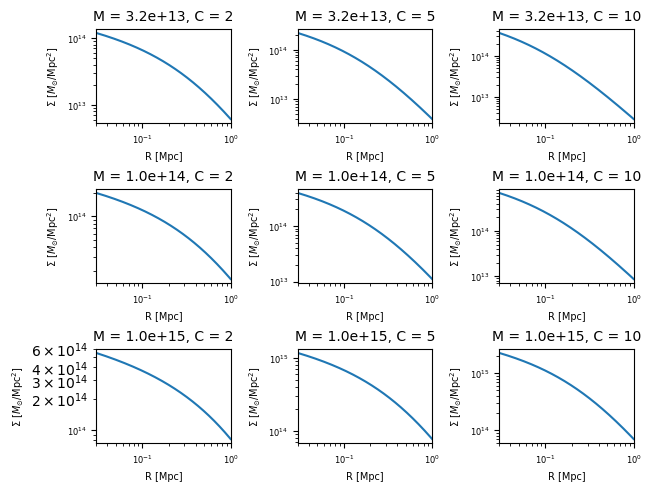

In [289]:
fig, axs = mpl.subplot_mosaic([['0', '1', '2'],
                               ['3', '4', '5'],
                               ['6', '7', '8']], layout='constrained')


massa = [10**(13.5), 10**(14), 10**(15)]
conc = [2, 5, 10]
R = np.linspace(0.03, 1.0, 10000)

for i in range (3):
    for j in range (3):
        x = r_s(massa[i], conc[j], 0.0)
        sigma_values = [Sigma(r, massa[i], conc[j], 0.0) for r in R]
        
        #grafico
        h=str(i*3+j)
        ax = axs[h]
        ax.plot(R, sigma_values)
       # ax.axvline(x)
        ax.set_title ("M = {:.1e}, C = {}".format(massa[i], conc[j]), fontsize=10)
        ax.set_xscale('log')
        ax.set_yscale('log')
        ax.set_xlim(0.03, 1.0)
        ax.set_xlabel("R [Mpc]", fontsize=7)
        ax.set_ylabel(r"$\Sigma\ [M_{\odot} / \mathrm{Mpc}^2]$", fontsize=7) 
        ax.tick_params(labelsize=6)





## Caricamento del campione di dati

Dopo aver osservato l'andamento della funzione Sigma vengono caricati i file con i dati estratti dalla simulazione in modo tale da poterli analizzare 

In [9]:
from astropy.io import fits
from astropy.table import Table

raggi = np.load('R_values.npy')

density_profile=fits.open('halo_catalog.fit')
density_profile.info()
print(density_profile[1].columns)
data = density_profile[1].data

z=data['z']
ricchezza=data['LAMBDA_TR']
profilo=data['SIGMA_of_R']

tab = Table(density_profile[1].data)
tab

Filename: halo_catalog.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     14   40103R x 3C   [E, E, 8E]   
ColDefs(
    name = 'Z'; format = 'E'
    name = 'LAMBDA_TR'; format = 'E'
    name = 'SIGMA_of_R'; format = '8E'
)


Z,LAMBDA_TR,SIGMA_of_R
float32,float32,float32[8]
0.5024944,290.69226,2351102000000000.0 .. 228581410000000.0
0.6013021,119.24578,2107659200000000.0 .. 262464400000000.0
0.20896086,126.37386,1814137000000000.0 .. 186497460000000.0
0.21276909,188.81273,2349731000000000.0 .. 191364780000000.0
0.458008,147.34962,2240655000000000.0 .. 231589270000000.0
0.2990278,168.87453,1887798800000000.0 .. 221516280000000.0
0.5334603,164.99342,3050272000000000.0 .. 360055730000000.0
0.41568014,165.4309,1599776800000000.0 .. 178856260000000.0
0.24627402,144.90552,1595923000000000.0 .. 192892010000000.0


A schermo sono state stampate le dimensioni del file oltre ad alcuni valori presenti in esso in modo tale da aiutare la comprensione dei dati da utilizzare nel resto del programma.

## Grafici dei dati suddivisi in intervalli di ricchezza
Il codice che segue si prefigge di suddividere il catalogo in intervalli di ricchezza in modo tale da ottenere 5 gruppi di profili; per ogni gruppo è stata calcolato il profilo medio corrispondente ad ogni valore di raggio a cui è stato calcolato e la sua deviazione standard. 

I risultati sono stati graficati in scala log-log

Oltre al profilo medio è stato calcolato anche il redshift medio e la sua deviazione standard corrispondente, tali valori sono stati salvati in un array perchè servono a stimare m e c successivamente.

Intervallo [15, 20], Raggio 0: Media = 6.0404e+14, Errore = 2.6163e+12
Intervallo [20, 30], Raggio 0: Media = 6.7175e+14, Errore = 2.5395e+12
Intervallo [30, 45], Raggio 0: Media = 8.3224e+14, Errore = 4.7014e+12
Intervallo [45, 60], Raggio 0: Media = 1.0175e+15, Errore = 1.0908e+13
Intervallo [60, 200], Raggio 0: Media = 1.2993e+15, Errore = 1.7522e+13


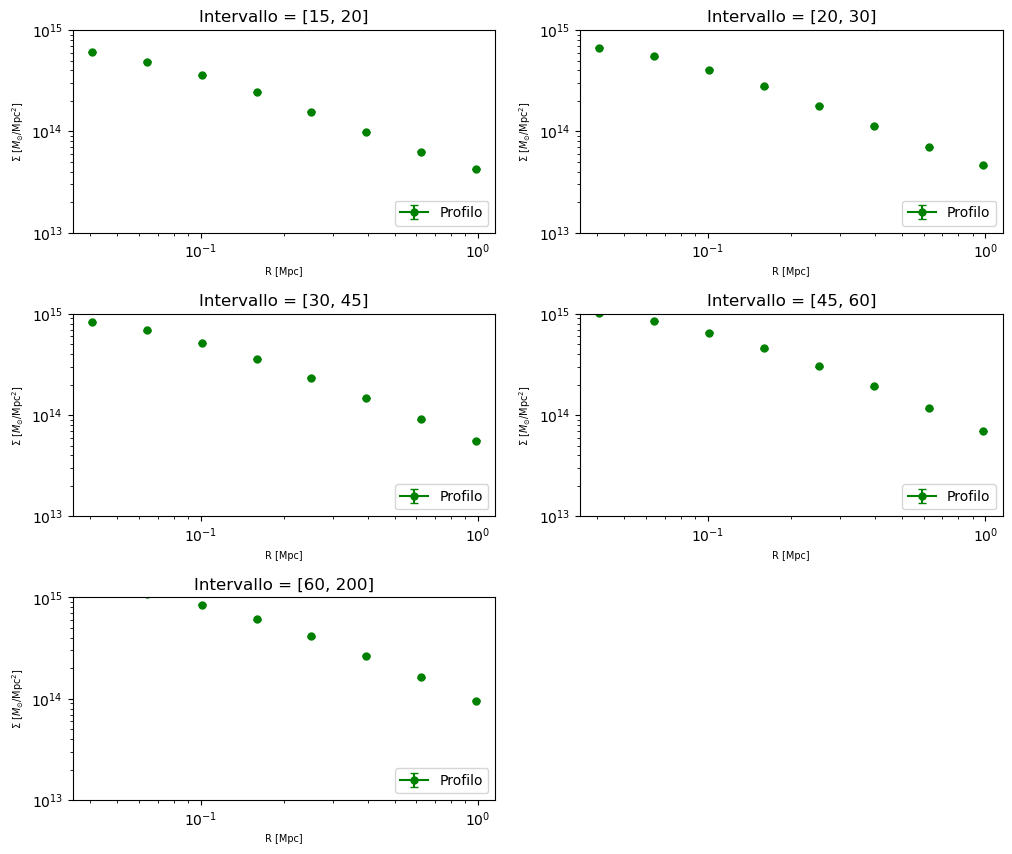

In [291]:
bin = np.array([15, 20, 30, 45, 60, 200]) 

intervalli = pd.cut (ricchezza, bin, right=True, labels=False, include_lowest=True)

if ricchezza.dtype.byteorder == '>':
    ricchezza = ricchezza.byteswap().newbyteorder()

if profilo.dtype.byteorder == '>':
    profilo = profilo.byteswap().newbyteorder()

if z.dtype.byteorder == '>':
    z = z.byteswap().newbyteorder() 
#questa parte è stata fatta per passare dai dati in formato big-endian a formato little-endian senza troncare i valori

fig, (axs) = mpl.subplots(nrows=3, ncols=2, figsize=(12, 10))
dim = np.zeros(5)

for h in range (5):
    for i in range (8):
        profilos=profilo[:, i]    
        df1 = pd.DataFrame({'ricchezza': ricchezza, 'profilo': profilos, 'z':z, 'int':intervalli})
        p = df1.groupby('int')['profilo'].aggregate(['mean', 'std'])
       
        bin_i = df1[df1["int"] == h]
        int_bin_i=bin_i['int']
        dim[h] = int_bin_i.shape[0]
        
    #GRAFICO
        
        riga = h // 2
        col = h % 2
        ax = axs[riga, col] 
        yerr1 = p.loc[h, 'std']/math.sqrt(dim[h])
        
        
        if i == 0:         
            ax.errorbar(raggi[i], p.loc[h, 'mean'], yerr=yerr1, fmt='-o', label='Profilo', color='green', markersize=5, capsize=3)
            ax.set_title(f"Intervallo = [{bin[h]}, {bin[h+1]}]", fontsize=12)
            ax.set_xlabel("R [Mpc]", fontsize=7)
            ax.set_ylabel(r"$\Sigma\ [M_{\odot} / \mathrm{Mpc}^2]$", fontsize=7)
            ax.tick_params(labelsize=10)
            ax.set_ylim(1e13, 1e15)
            ax.set_xscale('log')
            ax.set_yscale('log')
            print(f"Intervallo [{bin[h]}, {bin[h+1]}], Raggio {i}: Media = {p.loc[h, 'mean']:.4e}, Errore = {yerr1:.4e}")
   
        else:
            ax.errorbar(raggi[i], p.loc[h, 'mean'], yerr=yerr1, fmt='-o', color='green', markersize=5, capsize=3) #mettere radq n
       
    ax.legend(fontsize=10, loc='lower right')
    
fig.delaxes(axs[2, 1])  # Rimuovere l'ultima cella vuota
mpl.subplots_adjust(hspace=0.4)

z1 = df1.groupby('int')['z'].aggregate(['mean', 'std'])

Notiamo che i dati seguono l'andamento desiderato, le barre d'errore non sono visibili nel grafico e per tale motivo vengono stampati a schermo sia i valori medi sia l'errore ad essi associato corrispondenti al profilo calcolato nel primo raggio di ogni intervallo di richezza in modo tale da avere un'idea dell'ordine di grandezza dell'errore. 

## Implementazione dell'algoritmo emcee per la stima di m e c
A questo punto viene presentato il codice che ci permette di stimare m e c per ogni bin di ricchezza utilizzando il metodo di campionamento emcee.

### Definizione delle funzioni necessarie all'algoritmo
1. **Prior:** Si è deciso di utilizzare un prior uniforme che scarta i valori fuori dall'intervallo $[13, 16]$ per il $\log_{10}M$ mentre quelli fuori dall'intervallo $[0.2, 20]$ per la concentrazione
2. **Likelihood:** come funzione di likelihood si è deciso di utilizzare una multinormale utilizzando come matrice di covarianza quella fornita assieme ai dati. Il logaritmo della funzione di likelihood viene poi sommato in modo tale da ottenere la funzione di likelihood totale.
3. **Posterior:** definito come somma del prior e della funzione di likelihood.

### Implementazione dell'algoritmo emcee
Dopo aver definito queste funzioni, sono stati utilizzati i gruppi di  ricchezza trovati precedentemente e si è lavorato considerando una riga di dati alla volta; la matrice di covarianza è la stessa per tutti i dati presenti in uno stesso intervallo di ricchezza mentre come redshift si è utilizzato il valor medio di tutti i redshift calcolato prima. 

Il numero di iterazioni impostato è di 5000 per non ricadere nell'errore di correlazione temporale che impone che il numero di passi debba essere maggiore di 50 volte il tempo di autocorrelazione.

Il numero di walkers è stato impostato a 32 per migliorare la convergenza dell'algoritmo, inoltre si è deciso di scartare i primi 100 campioni della catena perchè rappresentano la fase di burn-in. 

L'algoritmo è stato fatto iterare 5 volte in modo tale da poter stimare il $\log{10}M$ e la concentrazione c per ogni intervallo di ricchezza; i valori delle catene sono stati salvati in delle tuple e poi trasformati in array numpy in modo tale da poterli utilizzare nelle fasi successive dell'analisi senza dover reiterare tutto il processo.

In [143]:
from scipy.stats import multivariate_normal

def log_prior(theta):
    m, c = theta #m indica la massa mentre c la concentrazione
    if 13 < m < 16 and 0.2 < c < 20:
        return 0.0  
    return -np.inf  

def log_likelihood(theta, dati, cov_matrix, R, z):
     m, c = theta  # Estrai i parametri da theta
     
     modello = Sigma(R, 10**m, c, z)
     dati=dati.T
     log_likelihood_totale = np.sum(multivariate_normal.logpdf(dati, mean=modello, cov=cov_matrix))

    # Calcola il log-likelihood usando la distribuzione gaussiana multivariata
     return log_likelihood_totale

def log_posterior(theta, dati, cov_matrix, R, z):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, dati, cov_matrix, R, z)  # Posterior = prior + likelihood


C:\Users\rober\Desktop\anaconda3\Lib\site-packages\scipy\optimize\_numdiff.py:590: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
  0%|          | 0/5000 [00:00<?, ?it/s]C:\Users\rober\Desktop\anaconda3\Lib\site-packages\emcee\moves\red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]
100%|██████████| 5000/5000 [03:35<00:00, 23.22it/s]


[25.63004263 53.22484149]


100%|██████████| 5000/5000 [04:15<00:00, 19.60it/s]


[24.37450109 47.68744886]


100%|██████████| 5000/5000 [02:18<00:00, 36.00it/s]


[34.20690209 40.57704475]


100%|██████████| 5000/5000 [01:27<00:00, 56.92it/s]


[15.4513392  44.75504996]


100%|██████████| 5000/5000 [01:28<00:00, 56.64it/s]


[19.76797498 45.55596702]


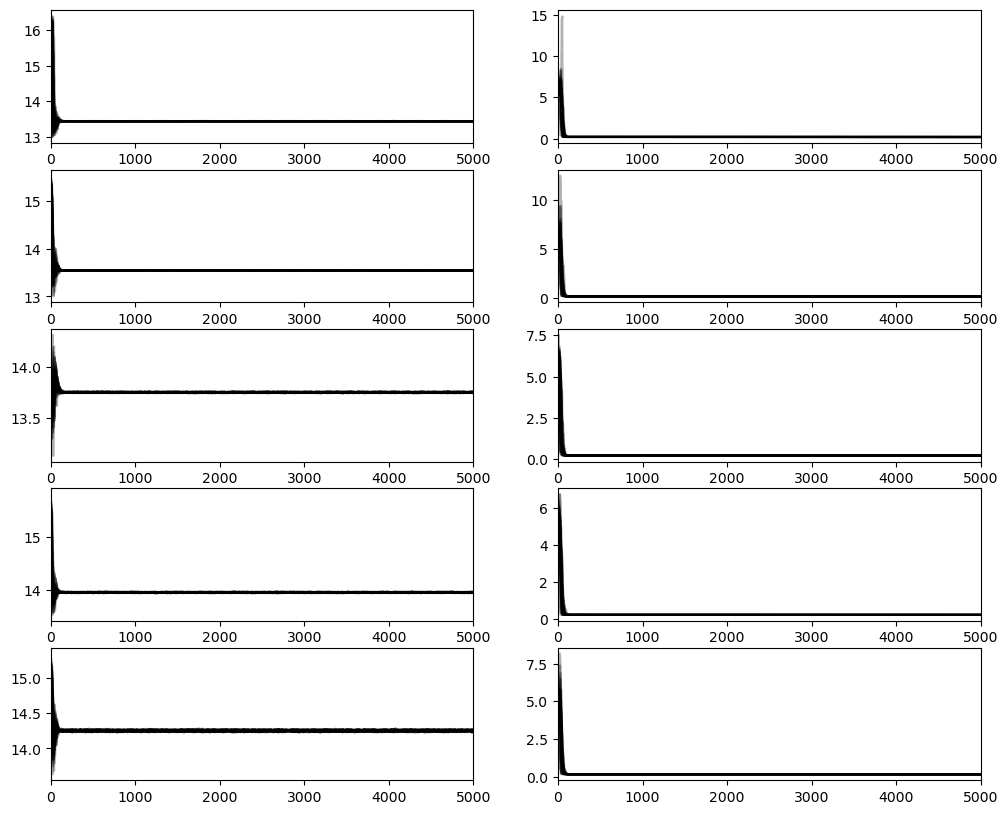

In [176]:
import emcee
from scipy.optimize import minimize


cov = np.load('covariance_matrices.npy')

fig, (axes) = mpl.subplots(nrows=5, ncols=2, figsize=(12, 10))

np.random.seed(42) 
all_flat_samples = []


for i in range (5):
    cov_i=cov[i, :, :]
    
    profili_bin_i = np.array([df1[df1["int"] == i]["profilo"] for h in range(8)])
        
  
    
    nll = lambda *args: -log_posterior(*args) 
    initial = np.array([14.5, 5.])*(1+ 0.1 * np.random.randn(2))
    soln = minimize(nll, initial, args=(profili_bin_i, cov_i, raggi, z1.loc[i, 'mean']), bounds=[(13, 16), (0.2, 20)]) 
    
    pos = soln.x + (1+1e-1 * np.random.randn(32, 2)) #distribuzione iniziale dei camminatori
    nwalkers, ndim = pos.shape
        
    sampler = emcee.EnsembleSampler(
        nwalkers, ndim, log_posterior, args=(profili_bin_i, cov_i, raggi, z1.loc[i, 'mean']))
    
    sampler.run_mcmc(pos, 5000, progress=True);
  
    samples = sampler.get_chain()
    labels = ["m", "c"]
    for h in range(ndim):
        ax = axes[i, h]
        ax.plot(samples[:, :, h], "k", alpha=0.3)
        ax.set_xlim(0, len(samples))
        ax.yaxis.set_label_coords(-0.1, 0.5)

    tau = sampler.get_autocorr_time()
    print(tau)

    flat_samples = sampler.get_chain(discard=100, flat=True)
    all_flat_samples.append(flat_samples)
    
all_flat_samples = np.array(all_flat_samples)
    

Da questi grafici che rappresentano lo spostamento degli walkers possiamo notare che la catena converge molto velocemente a un valore senza poi spostarsi, questo significa che l'algoritmo non sta funzionando come dovrebbe. 

La causa è da ricercarsi nel fatto che la maggior parte dei valori di massa e concentrazione passati al prior vengono scartati restituendo $-\inf $ perchè sono fuori dal range che abbiamo imposto. Ciò è dovuto al fatto che la posizione dei camminatori arriva e supera dopo pochi passi uno degli estremi per entrambi i parametri. Per cercare di risolvere il problema si è provato a modificare il passo con cui viene definita la posizione dei camminatori ma senza ottenere nessun risultato valido. 

Vengono riportati comunque i posteriors e i relativi grafici triangolari ottenuti per ogni intervallo da cui si può osservare ulteriormente che l'algoritmo non converge nella maniera desiderata. 

In [281]:
m_opt, c_opt, m_err, c_err, m_mean, c_mean,  m_err_mean, c_err_mean = [np.zeros(5) for _ in range(8)]

for i in range (5):
    m_opt[i], c_opt[i] = np.median(all_flat_samples[i], axis=0) 
    
    m_err[i] = np.std(all_flat_samples[i][:, 0])  # Errore su m (deviazione standard)
    c_err[i] = np.std(all_flat_samples[i][:, 1])  # Errore su c (deviazione standard)


    m_mean[i], c_mean[i] = np.mean(all_flat_samples[i], axis=0)  # Valore medio
    m_err_mean[i] = np.std(all_flat_samples[i][:, 0])/math.sqrt(dim[i])  # Errore su m
    c_err_mean[i] = np.std(all_flat_samples[i][:, 1])/math.sqrt(dim[i])  # Errore su c

    print(f"Intervallo [{bin[i]}, {bin[i+1]}]")
    
    print(f"Stima ottimale: log10(m) = {m_opt[i]}, c = {c_opt[i]} "
          f"errore associato alla stima di m = {m_err[i]}, errore associato alla stima di c = {c_err[i]}")

    print(f"Valor medio: log10(m) = {m_mean[i]}, c = {c_mean[i]} "
          f"errore associato al valor medio di m = {m_err_mean[i]}, errore associato al valor medio di c = {c_err_mean[i]}\n")

Intervallo [15, 20]
Stima ottimale: log10(m) = 13.447585225981209, c = 0.20002942744683333 errore associato alla stima di m = 0.002951793129575341, errore associato alla stima di c = 0.0011147661647214716
Valor medio: log10(m) = 13.447648328929725, c = 0.20008465841281825 errore associato al valor medio di m = 2.9248621398069314e-05, errore associato al valor medio di c = 1.1045954803752408e-05

Intervallo [20, 30]
Stima ottimale: log10(m) = 13.550227358334958, c = 0.2000244601853727 errore associato alla stima di m = 0.0023706341328197573, errore associato alla stima di c = 0.0009892441504391095
Valor medio: log10(m) = 13.550218476374976, c = 0.20007428957504333 errore associato al valor medio di m = 2.0687863045298158e-05, errore associato al valor medio di c = 8.6328578582913e-06

Intervallo [30, 45]
Stima ottimale: log10(m) = 13.753493528104892, c = 0.20005700598274426 errore associato alla stima di m = 0.003445427728070515, errore associato alla stima di c = 0.0007010947308365572


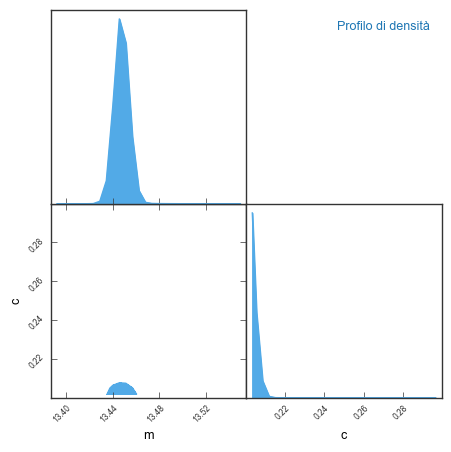

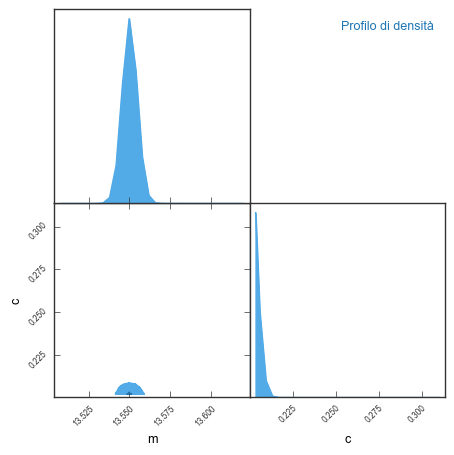

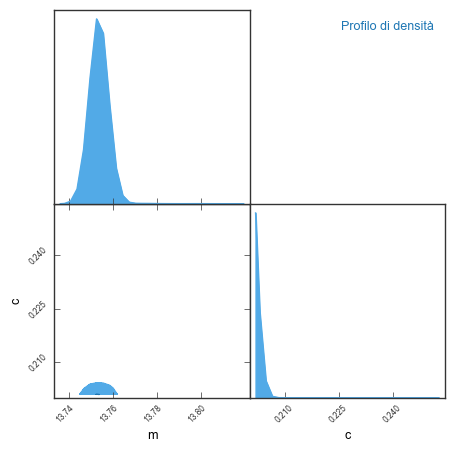

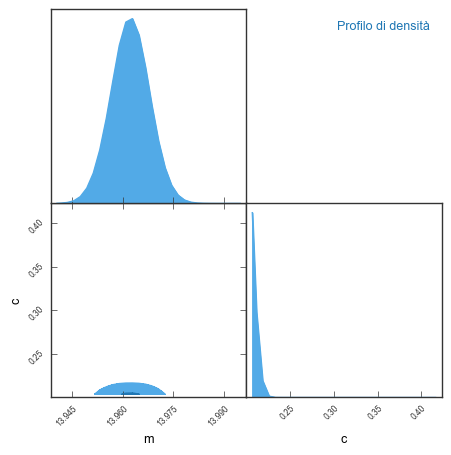

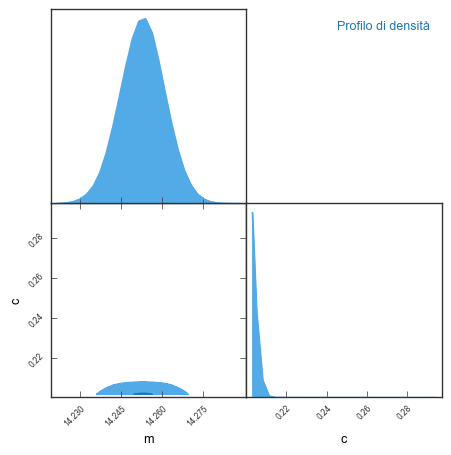

In [188]:
import pygtc
for i in range (5):
    
    GTC = pygtc.plotGTC(chains=[all_flat_samples[i]],  # `flat_samples` deve essere una lista di array
                         paramNames=['m', 'c'],  # Nomina i parametri
                         chainLabels=['Profilo di densità'],  # Nome della catena
                         figureSize='MNRAS_page')  # Stile per pubblicazioni MNRAS

   